# NLP Practical 6
> 19BCE245 - Aayush Shah

- Precision Recall, Rank Precision

In [199]:
import pandas as pd
import string

In [200]:
# Enter ground truth value here 
ground_truth = 5

In [201]:
data = pd.read_csv('prac6-dataset-2.csv')
# data = pd.read_csv('prac6-dataset.csv')
print("Given data is :")
print(data)

Given data is :
   Rank Relevance
0     1         +
1     2         +
2     3         +
3     4         -
4     5         +
5     6         -
6     7         -
7     8         +
8     9         -
9    10         -


In [202]:
rank = list(data['Rank'])
relevance = list(data['Relevance'])
# print(rank, relevance)
# data = data.assign(D=rank)
# print(data)

In [203]:
precision = []
recall = []
relevant_docs_until_now = 0
avg_precision = 0
breakeven_point = -1

for i in range(len(rank)):
  if relevance[i] == '+':
    relevant_docs_until_now += 1

  precision.append( round(relevant_docs_until_now/(i+1),4) * 100 )
  recall.append( round((relevant_docs_until_now/ground_truth),4) * 100 )

  if relevance[i] == '+':
    avg_precision += precision[i]
  
  if precision[i] == recall[i]:
    breakeven_point = i+1
  
if breakeven_point==-1:
  min_diff = 1
  for i in range(len(rank)):
    if min_diff>abs(precision[i]-recall[i]):
      min_diff = abs(precision[i]-recall[i])
      breakeven_point = i+1

avg_precision/=relevant_docs_until_now

In [204]:
precision_strings = [str(i)+'%' for i in precision]
recall_strings = [str(i)+'%' for i in recall]
print(precision_strings)
print(recall_strings)

# data = data.assign(Precision=precision)
# data = data.assign(Recall=recall)

# data = data.assign(Precision=precision_strings)
# data = data.assign(Recall=recall_strings)

['100.0%', '100.0%', '100.0%', '75.0%', '80.0%', '66.67%', '57.14%', '62.5%', '55.559999999999995%', '50.0%']
['20.0%', '40.0%', '60.0%', '60.0%', '80.0%', '80.0%', '80.0%', '100.0%', '100.0%', '100.0%']


In [205]:
print(data)
print('Average Precision :', avg_precision)
print('Break Even Point :', breakeven_point)

   Rank Relevance
0     1         +
1     2         +
2     3         +
3     4         -
4     5         +
5     6         -
6     7         -
7     8         +
8     9         -
9    10         -
Average Precision : 88.5
Break Even Point : 5


## PR Curve

In [206]:
recalls = list(range(0, 110, 10))
# print(recalls)

In [207]:
precisions = []
for i in range(11):
  count = 0
  while(recall[count]<recalls[i]):
    count+=1
  precisions.append(max(precision[count:]))

# print(precisions)

In [208]:
pr_curve = pd.DataFrame({'Recalls':recalls, 'Precisions':precisions})
print(pr_curve)

    Recalls  Precisions
0         0       100.0
1        10       100.0
2        20       100.0
3        30       100.0
4        40       100.0
5        50       100.0
6        60       100.0
7        70        80.0
8        80        80.0
9        90        62.5
10      100        62.5


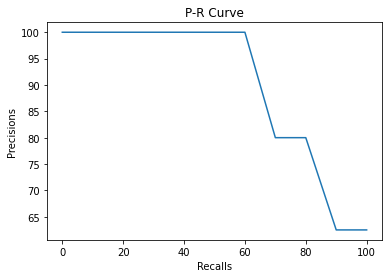

In [209]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions)
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('P-R Curve')
plt.show()